# What do importance scores bring compared to protein expression levels and protein correlations with NfL?

To answer this question, we will consider a hypothetical scenario. 
- Consider two proteins whose expression levels are in [0, 10].
- Assume that NfL depends on those proteins according to the relationship depicted below.

In what follows, `target` refers to NfL.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Set smaller font sizes for all plots
plt.rcParams.update({
    'font.size': 8,          # Base font size
    'axes.titlesize': 9,     # Title font size
    'axes.labelsize': 8,     # Axis label font size
    'xtick.labelsize': 7,    # X-axis tick label size
    'ytick.labelsize': 7,    # Y-axis tick label size
    'legend.fontsize': 7,    # Legend font size
})

Choose sampling of the values of the proteins for the participants.

In [3]:
# Regular grid

# grid_lines_1 = [0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
# grid_lines_2 = [0, 1, 2, 3, 4, 5, 5.4, 5.8, 6.2, 6.6, 7.0, 7.4, 7.8, 8.2, 8.6, 9.0, 9.4, 9.8]

# grid_lines_1 = np.arange(0, 10.5, 0.5)
# grid_lines_2 = np.arange(0, 10.5, 0.5)

# grid_lines_1 = [0, 1, 2, 3, 4, 5, 5.4, 5.8, 6.2, 6.6, 7.0, 7.4, 7.8, 8.2, 8.6, 9.0, 9.4, 9.8]
# grid_lines_2 = [0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# P1, P2 = np.meshgrid(grid_lines_1, grid_lines_2)
# P1 = P1.flatten()
# P2 = P2.flatten()

In [4]:
# Participants for which p1 and p2 do not matter
grid_lines_1 = np.arange(0, 3.5, 0.4)
grid_lines_2 = np.arange(0, 3.5, 0.4)
P1_bottom_left, P2_bottom_left = np.meshgrid(grid_lines_1, grid_lines_2)

grid_lines_1 = np.arange(6.5, 7.5, 0.1)
grid_lines_2 = np.arange(6.5, 7.5, 0.1)
P1_top_right, P2_top_right = np.meshgrid(grid_lines_1, grid_lines_2)

# Participants for which p1 and p2 matter
grid_lines_1 = np.arange(4, 4.5, 0.2)
grid_lines_2 = np.arange(5.5, 6.5, 0.2)
P1_first_grid, P2_first_grid = np.meshgrid(grid_lines_1, grid_lines_2)

grid_lines_1 = np.arange(3.5, 4.5, 0.2)
grid_lines_2 = np.arange(4, 4.5, 0.2)
P1_second_grid, P2_second_grid = np.meshgrid(grid_lines_1, grid_lines_2)

P1 = np.concatenate([P1_bottom_left.flatten(), P1_top_right.flatten(), P1_first_grid.flatten(), P1_second_grid.flatten()])
P2 = np.concatenate([P2_bottom_left.flatten(), P2_top_right.flatten(), P2_first_grid.flatten(), P2_second_grid.flatten()])



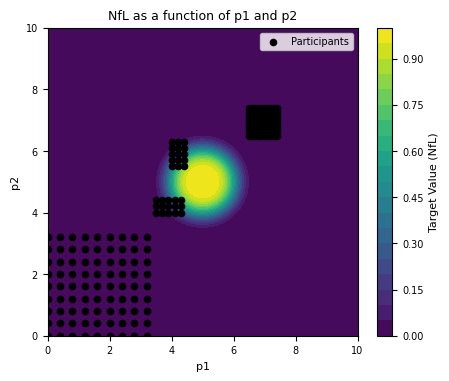

In [5]:
# Generate fine grid for the continuous surface
n_points = 100
p1_fine = np.linspace(0, 10, n_points)
p2_fine = np.linspace(0, 10, n_points)
P1_fine, P2_fine = np.meshgrid(p1_fine, p2_fine)
center = [5, 5]
variance = 0.8

# Generate target for continuous surface
distances_fine = (P1_fine - center[0])**2 + (P2_fine - center[1])**2
target_fine = np.exp(-distances_fine**2 / (2 * variance))

# Create plot
fig = plt.figure(figsize=(5, 4))

# Plot continuous surface
plt.contourf(P1_fine, P2_fine, target_fine, levels=20, cmap='viridis')
plt.colorbar(label='Target Value (NfL)')

# Overlay scatter points in black
plt.scatter(P1, P2, c='black', s=20, alpha=1., label='Participants')

plt.xlabel('p1')
plt.ylabel('p2')
plt.title('NfL as a function of p1 and p2')
plt.legend()
plt.show()

In [6]:
# Calculate distances from center for the grid points
distances = np.sqrt((P1 - center[0])**2 + (P2 - center[1])**2)

# Calculate target values using the same Gaussian function
target = np.exp(-distances**2 / (2 * variance))
target.shape

(211,)

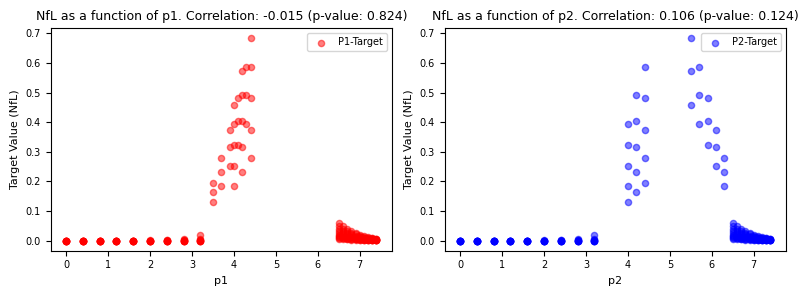

In [7]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# First subplot: P1-target scatter
ax1.scatter(P1, target.flatten(), c='red', s=20, alpha=0.5, label='P1-Target')
corr_p1, pval_p1 = pearsonr(P1, target.flatten())

ax1.set_xlabel('p1')
ax1.set_ylabel('Target Value (NfL)')
ax1.set_title(f'NfL as a function of p1. Correlation: {corr_p1:.3f} (p-value: {pval_p1:.3f})')
ax1.legend()

# Second subplot: P2-target scatter
ax2.scatter(P2, target.flatten(), c='blue', s=20, alpha=0.5, label='P2-Target')
corr_p2, pval_p2 = pearsonr(P2, target.flatten())

ax2.set_xlabel('p2')
ax2.set_ylabel('Target Value (NfL)')
ax2.set_title(f'NfL as a function of p2. Correlation: {corr_p2:.3f} (p-value: {pval_p2:.3f})')
ax2.legend()

plt.tight_layout()
plt.show()

The correlation is exactly 0, hidding the dependency of NfL with respect to p1 and p2.

By restricting p1 and p2 to certain values, we can show that dependency: it's a negative correlation for certain values, and a positive correlation for others.

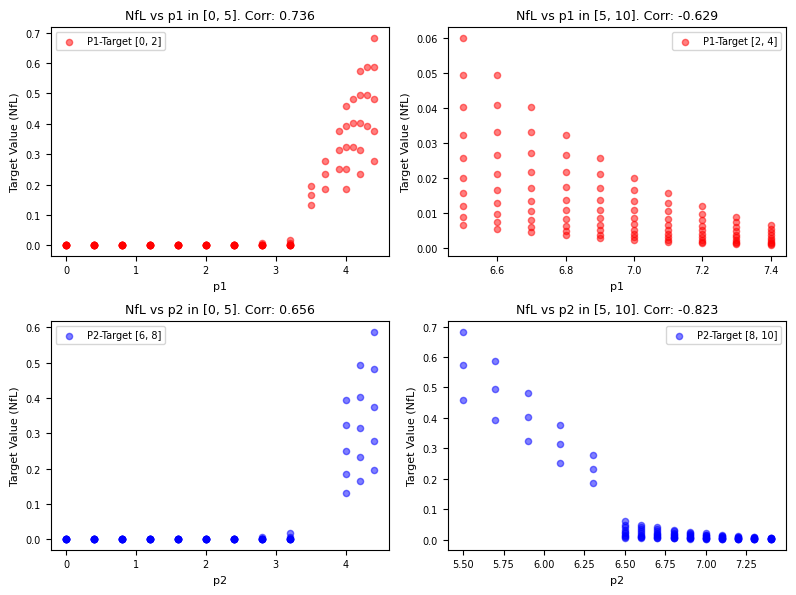

In [8]:
P1_range1 = [0, 5]
P1_range2 = [5, 10]
P2_range1 = [0, 5]
P2_range2 = [5, 10]

# Create figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Filter and plot for P1 in [0, 2]
mask_p1_0_2 = (P1 >= P1_range1[0]) & (P1 <= P1_range1[1])
axs[0, 0].scatter(P1[mask_p1_0_2], target[mask_p1_0_2], c='red', s=20, alpha=0.5, label='P1-Target [0, 2]')
corr_p1_0_2 = np.corrcoef(P1[mask_p1_0_2].flatten(), target[mask_p1_0_2].flatten())[0, 1]
axs[0, 0].set_xlabel('p1')
axs[0, 0].set_ylabel('Target Value (NfL)')
axs[0, 0].set_title(f'NfL vs p1 in {P1_range1}. Corr: {corr_p1_0_2:.3f}')
axs[0, 0].legend()

# Filter and plot for P1 in [2, 4]
mask_p1_2_4 = (P1 >= P1_range2[0]) & (P1 <= P1_range2[1])
axs[0, 1].scatter(P1[mask_p1_2_4], target[mask_p1_2_4], c='red', s=20, alpha=0.5, label='P1-Target [2, 4]')
corr_p1_2_4 = np.corrcoef(P1[mask_p1_2_4].flatten(), target[mask_p1_2_4].flatten())[0, 1]
axs[0, 1].set_xlabel('p1')
axs[0, 1].set_ylabel('Target Value (NfL)')
axs[0, 1].set_title(f'NfL vs p1 in {P1_range2}. Corr: {corr_p1_2_4:.3f}')
axs[0, 1].legend()

# Filter and plot for P2 in [6, 8]
mask_p2_6_8 = (P2 >= P2_range1[0]) & (P2 <= P2_range1[1])
axs[1, 0].scatter(P2[mask_p2_6_8], target[mask_p2_6_8], c='blue', s=20, alpha=0.5, label='P2-Target [6, 8]')
corr_p2_6_8 = np.corrcoef(P2[mask_p2_6_8].flatten(), target[mask_p2_6_8].flatten())[0, 1]
axs[1, 0].set_xlabel('p2')
axs[1, 0].set_ylabel('Target Value (NfL)')
axs[1, 0].set_title(f'NfL vs p2 in {P2_range1}. Corr: {corr_p2_6_8:.3f}')
axs[1, 0].legend()

# Filter and plot for P2 in [8, 10]
mask_p2_8_10 = (P2 >= P2_range2[0]) & (P2 <= P2_range2[1])
axs[1, 1].scatter(P2[mask_p2_8_10], target[mask_p2_8_10], c='blue', s=20, alpha=0.5, label='P2-Target [8, 10]')
corr_p2_8_10 = np.corrcoef(P2[mask_p2_8_10].flatten(), target[mask_p2_8_10].flatten())[0, 1]
axs[1, 1].set_xlabel('p2')
axs[1, 1].set_ylabel('Target Value (NfL)')
axs[1, 1].set_title(f'NfL vs p2 in {P2_range2}. Corr: {corr_p2_8_10:.3f}')
axs[1, 1].legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

However, we would like to avoid doing this manually. Importance scores can help us identify areas of values of (p1, p2) -- i.e., participants -- for which the proteins are important -- i.e., highly correlated.

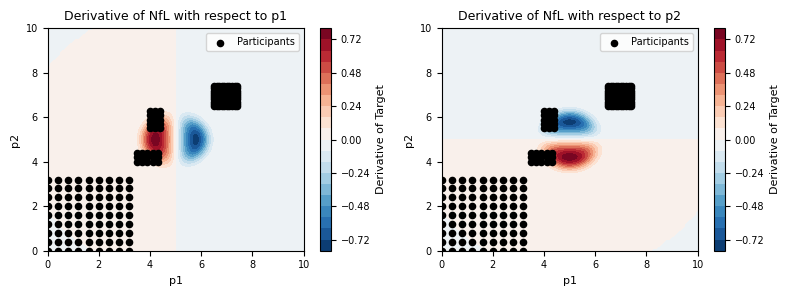

In [9]:
# Calculate derivatives of target function
x_derivative = target_fine * (-1/variance) * (P1_fine - center[0])
y_derivative = target_fine * (-1/variance) * (P2_fine - center[1])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Plot x-derivative
im1 = ax1.contourf(P1_fine, P2_fine, x_derivative, levels=20, cmap='RdBu_r')
plt.colorbar(im1, ax=ax1, label='Derivative of Target')
ax1.scatter(P1, P2, c='black', s=20, alpha=1., label='Participants')
ax1.set_xlabel('p1')
ax1.set_ylabel('p2')
ax1.set_title('Derivative of NfL with respect to p1')
ax1.legend(loc='upper right')

# Plot y-derivative  
im2 = ax2.contourf(P1_fine, P2_fine, y_derivative, levels=20, cmap='RdBu_r')
plt.colorbar(im2, ax=ax2, label='Derivative of Target')
ax2.scatter(P1, P2, c='black', s=20, alpha=1., label='Participants')
ax2.set_xlabel('p1')
ax2.set_ylabel('p2')
ax2.set_title('Derivative of NfL with respect to p2')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

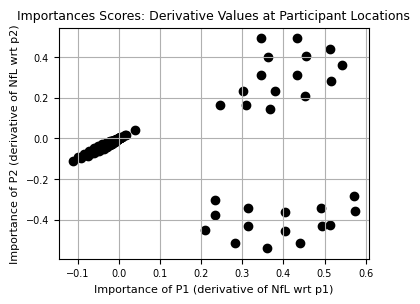

In [10]:
# Get derivative values at participant locations
x_deriv_at_points = target.flatten() * (-1/variance) * (P1 - center[0])
y_deriv_at_points = target.flatten() * (-1/variance) * (P2 - center[1])

# Create scatter plot of derivatives
plt.figure(figsize=(4, 3))
plt.scatter(x_deriv_at_points, y_deriv_at_points, c='black')
plt.xlabel('Importance of P1 (derivative of NfL wrt p1)')
plt.ylabel('Importance of P2 (derivative of NfL wrt p2)') 
plt.title('Importances Scores: Derivative Values at Participant Locations')
plt.grid(True)
plt.show()


From the importance plot, we clearly see that there are three regimes: 
- left: none of the proteins are important
- bottom right: both proteins p1 and p2 are important: positive correlation for p1 and negative correlation for p2.
- top right: both proteins p1 and p2 are important: positive correlation for both.

## Correlation between importance score and expression.

The following plot shows that the importance score and the expression of the protein are very different notions, since all four scenarios happen:
- high expression, low importance: further right on the plot
- low expression, low importance: further left on the plot
- high expression, high importance: bottom right
- lower expression, high impotrance: top left

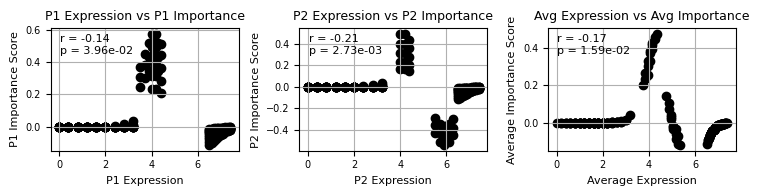

In [11]:
# Plot P1 and P2 vs their importance scores and average plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7.5, 2))

# P1 plot
ax1.scatter(P1, x_deriv_at_points, c='black')
# Compute correlation between P1 expression and importance
corr_1, pval_1 = pearsonr(P1, x_deriv_at_points)
ax1.text(0.05, 0.95, f'r = {corr_1:.2f}\np = {pval_1:.2e}', 
         transform=ax1.transAxes, verticalalignment='top')

ax1.set_xlabel('P1 Expression')
ax1.set_ylabel('P1 Importance Score')
ax1.set_title('P1 Expression vs P1 Importance')
ax1.grid(True)

# P2 plot 
ax2.scatter(P2, y_deriv_at_points, c='black')
# Compute correlation between P2 expression and importance
corr_2, pval_2 = pearsonr(P2, y_deriv_at_points)
ax2.text(0.05, 0.95, f'r = {corr_2:.2f}\np = {pval_2:.2e}', 
         transform=ax2.transAxes, verticalalignment='top')
ax2.set_xlabel('P2 Expression')
ax2.set_ylabel('P2 Importance Score')
ax2.set_title('P2 Expression vs P2 Importance')
ax2.grid(True)

# Average plot
avg_expression = (P1 + P2) / 2
avg_importance = (x_deriv_at_points + y_deriv_at_points) / 2
ax3.scatter(avg_expression, avg_importance, c='black')
# Compute correlation between average expression and average importance
corr_avg, pval_avg = pearsonr(avg_expression, avg_importance)
ax3.text(0.05, 0.95, f'r = {corr_avg:.2f}\np = {pval_avg:.2e}', 
         transform=ax3.transAxes, verticalalignment='top')
ax3.set_xlabel('Average Expression')
ax3.set_ylabel('Average Importance Score')
ax3.set_title('Avg Expression vs Avg Importance')
ax3.grid(True)

plt.tight_layout()
plt.show()

There is a negative correlation between the expression and the importance, but this is due to how we have sampled the participants.

We could do another simulation and map:
- P1 --> 10 - P1
- P2 --> 10 - P2

and the correlation would be come positive.

## Correlations: Importance - Expression and NfL - Expression

We compute the correlations of Corr(Importance, Expression) and Corr(NfL, Expression).

In [12]:
# For p1 print the correlation between importance and expression and the correlation between NfL and expression
print(f"Corr(Importance, P1) = {corr_1:.3f}")
print(f"Corr(NfL, P1) = {corr_p1:.3f}")

# For p2 print the correlation between importance and expression and the correlation between NfL and expression
print(f"Corr(Importance, P2) = {corr_2:.3f}")
print(f"Corr(NfL, P2) = {corr_p2:.3f}")



Corr(Importance, P1) = -0.142
Corr(NfL, P1) = -0.015
Corr(Importance, P2) = -0.205
Corr(NfL, P2) = 0.106


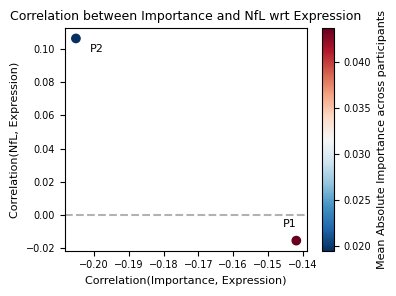

In [26]:
# make scatter plot where on x-axis we have corr(importance, expression) and on y-axis we have corr(NfL, expression)
fig, ax = plt.subplots(figsize=(4, 3))

mean_importance_p1 = np.abs(np.mean(x_deriv_at_points))
mean_importance_p2 = np.abs(np.mean(y_deriv_at_points))
scatter = ax.scatter([corr_1, corr_2], [corr_p1, corr_p2], c=[mean_importance_p1, mean_importance_p2], cmap='RdBu_r')

# Add text labels for P1 and P2 points
ax.annotate('P1', (corr_1, corr_p1), xytext=(-10, 10), textcoords='offset points')
ax.annotate('P2', (corr_2, corr_p2), xytext=(10, -10), textcoords='offset points')

plt.colorbar(scatter, label='Mean Absolute Importance across participants')
ax.set_xlabel('Correlation(Importance, Expression)')
ax.set_ylabel('Correlation(NfL, Expression)')
ax.set_title('Correlation between Importance and NfL wrt Expression')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Can we have a case where 

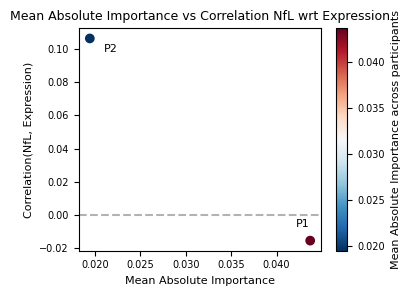

In [27]:
# make scatter plot where on x-axis we have corr(importance, expression) and on y-axis we have corr(NfL, expression)
fig, ax = plt.subplots(figsize=(4, 3))

mean_importance_p1 = np.abs(np.mean(x_deriv_at_points))
mean_importance_p2 = np.abs(np.mean(y_deriv_at_points))
scatter = ax.scatter([mean_importance_p1, mean_importance_p2], [corr_p1, corr_p2], c=[mean_importance_p1, mean_importance_p2], cmap='RdBu_r')

# Add text labels for P1 and P2 points
ax.annotate('P1', (mean_importance_p1, corr_p1), xytext=(-10, 10), textcoords='offset points')
ax.annotate('P2', (mean_importance_p2, corr_p2), xytext=(10, -10), textcoords='offset points')

plt.colorbar(scatter, label='Mean Absolute Importance across participants')
ax.set_xlabel('Mean Absolute Importance')
ax.set_ylabel('Correlation(NfL, Expression)')
ax.set_title('Mean Absolute Importance vs Correlation NfL wrt Expression')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

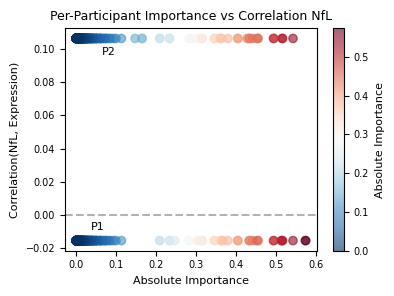

In [31]:
# Create scatter plot with one point per protein-participant pair
fig, ax = plt.subplots(figsize=(4, 3))

# For P1: Repeat corr_p1 for each participant's importance value
p1_importances = np.abs(x_deriv_at_points)  # Shape: (n_participants,)
p1_corrs = np.repeat(corr_p1, len(p1_importances))

# For P2: Repeat corr_p2 for each participant's importance value  
p2_importances = np.abs(y_deriv_at_points)  # Shape: (n_participants,)
p2_corrs = np.repeat(corr_p2, len(p2_importances))

# Combine data for both proteins
all_importances = np.concatenate([p1_importances, p2_importances])
all_corrs = np.concatenate([p1_corrs, p2_corrs])
protein_labels = np.concatenate([['P1']*len(p1_importances), ['P2']*len(p2_importances)])

# Create scatter plot
scatter = ax.scatter(all_importances, all_corrs, c=all_importances, cmap='RdBu_r', alpha=0.6)

# Add text labels for P1 and P2 points
# Use mean position for label placement
ax.text(np.mean(p1_importances), corr_p1 + 0.005, 'P1', 
        horizontalalignment='right', verticalalignment='bottom')
ax.text(np.mean(p2_importances), corr_p2 - 0.005, 'P2',
        horizontalalignment='left', verticalalignment='top')

plt.colorbar(scatter, label='Absolute Importance')
ax.set_xlabel('Absolute Importance')
ax.set_ylabel('Correlation(NfL, Expression)')
ax.set_title('Per-Participant Importance vs Correlation NfL')
ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
